## Observations and Insights 

In [ ]:
#Inferences from data
#1. Based on data the average tumor volume in mm^3 increased with the weight of the individual mouse. 
#2. Ramicane and Capomulin had the lowest final tumor volumes of the four analyzed (Capomulin, Ramicane, Infubinol, and 
# ceftamin) after 45 days of treatment.
#3. Ramicane and Capomulin had the highest number of measurements taken in the study, which should be considered when analyzing the rest of the data.


In [195]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
mouse_study = pd.DataFrame.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")


# Display the data table for preview
mouse_study.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice.
mouse_list = mouse_study['Mouse ID'].unique()

mouse_count = len(mouse_list)
print(mouse_count)

249


In [43]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
newVar = mouse_study.loc[mouse_study.duplicated(subset = ['Mouse ID','Sex','Timepoint']), 'Mouse ID'].unique()
newVar

array(['g989'], dtype=object)

In [44]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dup = mouse_study.loc[mouse_study['Mouse ID']=='g989']
mouse_dup.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [49]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study[mouse_study['Mouse ID'].isin(newVar)==False]

mouse_study_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [55]:
# Checking the number of mice in the clean DataFrame.
numMice = mouse_study_clean['Mouse ID'].unique()
len(numMice)

248

## Summary Statistics

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = mouse_study_clean.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = mouse_study_clean.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = mouse_study_clean.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
StdDev = mouse_study_clean.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
SEM = mouse_study_clean.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

stat_sum = pd.DataFrame(mean)
stat_sum_all = stat_sum.rename(columns={'Tumor Volume (mm3)' : "Mean"})
stat_sum_all['Median'] = median
stat_sum_all['Variance'] = variance
stat_sum_all['Standard Dev.'] = StdDev
stat_sum_all['SEM'] = SEM

stat_sum_all.head()

,Mean,Median,Variance,Standard Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_data = mouse_study_clean.groupby('Drug Regimen')
drug_table = drug_data.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
drug_table.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

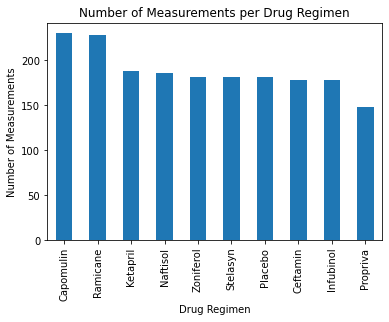

In [94]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measureDrug = mouse_study_clean['Drug Regimen'].value_counts()

measureDrug.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.title('Number of Measurements per Drug Regimen')
plt.show()

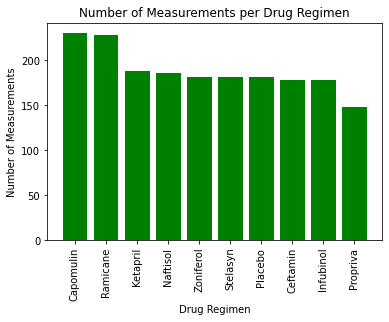

In [138]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measureDrug = mouse_study_clean['Drug Regimen'].value_counts()
plt.bar(measureDrug.index.values, measureDrug.values, color='green')
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.title('Number of Measurements per Drug Regimen')
plt.show()

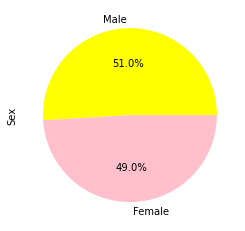

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
MouseSex = mouse_study_clean['Sex'].value_counts()

MouseSex.plot(kind='pie', autopct='%1.1f%%', colors=['yellow','pink'])
plt.show()


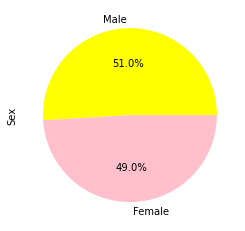

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
MouseSex = mouse_study_clean['Sex'].value_counts()
plt.pie(MouseSex.values, labels=MouseSex.index.values, autopct='%1.1f%%', colors=['yellow','pink'])
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [107]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capo = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"]=="Capomulin"]
Rami = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"]=="Ramicane"]
Infu = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"]=="Infubinol"]
Ceft = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"]=="Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
capo_max = Capo.groupby('Mouse ID').max()['Timepoint']
rami_max = Rami.groupby('Mouse ID').max()['Timepoint']
infu_max = Infu.groupby('Mouse ID').max()['Timepoint']
ceft_max = Ceft.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capVol_max = pd.DataFrame(capo_max)
capMax_w_study = pd.merge(capVol_max, mouse_study_clean, on=('Mouse ID','Timepoint'), how='left')


In [108]:
ramVol_max = pd.DataFrame(rami_max)
ramMax_w_study = pd.merge(ramVol_max, mouse_study_clean, on=('Mouse ID','Timepoint'), how='left')

infVol_max = pd.DataFrame(infu_max)
infMax_w_study = pd.merge(infVol_max, mouse_study_clean, on=('Mouse ID','Timepoint'), how='left')

cefVol_max = pd.DataFrame(ceft_max)
cefMax_w_study = pd.merge(cefVol_max, mouse_study_clean, on=('Mouse ID','Timepoint'), how='left')

In [112]:
#Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
cap_tumors = capMax_w_study["Tumor Volume (mm3)"]
ram_tumors = ramMax_w_study["Tumor Volume (mm3)"]
inf_tumors = infMax_w_study["Tumor Volume (mm3)"]
cef_tumors = cefMax_w_study["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#cap
CAquartiles = cap_tumors.quantile([0.25,0.5,0.75])
CAlower = CAquartiles[0.25]
CAupper = CAquartiles[0.75]
CAiqr = CAupper - CAlower

CAmin_bounds = CAlower - (1.5* CAiqr)
CAmax_bounds = CAupper + (1.5* CAiqr)

#ram
Rquartiles = ram_tumors.quantile([0.25,0.5,0.75])
Rlower = Rquartiles[0.25]
Rupper = Rquartiles[0.75]
Riqr = Rupper - Rlower

Rmin_bounds = Rlower - (1.5* Riqr)
Rmax_bounds = Rupper + (1.5* Riqr)

#inf
Iquartiles = inf_tumors.quantile([0.25,0.5,0.75])
Ilower = Iquartiles[0.25]
Iupper = Iquartiles[0.75]
Iiqr = Iupper - Ilower

Imin_bounds = Ilower - (1.5* Iiqr)
Imax_bounds = Iupper + (1.5* Iiqr)

#cef
CEquartiles = cef_tumors.quantile([0.25,0.5,0.75])
CElower = CEquartiles[0.25]
CEupper = CEquartiles[0.75]
CEiqr = CEupper - CElower

CEmin_bounds = CElower - (1.5* CEiqr)
CEmax_bounds = CEupper + (1.5* CEiqr)

    # Determine outliers using upper and lower bounds
    
print(f"Capomulin outliers are below {CAmin_bounds} and above {CAmax_bounds}")
print(f"Ramicane outliers are below {Rmin_bounds} and above {Rmax_bounds}")
print(f"Infubinol outliers are below {Imin_bounds} and above {Imax_bounds}")
print(f"Ceftamin outliers are below {CEmin_bounds} and above {CEmax_bounds}")


Capomulin outliers are below 20.70456164999999 and above 51.83201549
Ramicane outliers are below 17.912664470000003 and above 54.30681135
Infubinol outliers are below 36.83290494999999 and above 82.74144559000001
Ceftamin outliers are below 25.355449580000002 and above 87.66645829999999


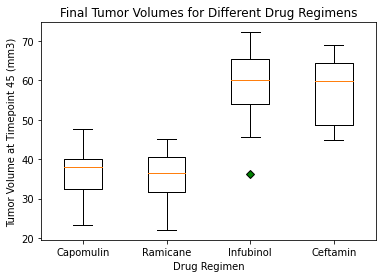

In [170]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxPlot = [cap_tumors, ram_tumors, inf_tumors, cef_tumors]


outlier = dict(markerfacecolor='g', marker='D')
plt.boxplot(boxPlot, flierprops= outlier, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume at Timepoint 45 (mm3)")
plt.title("Final Tumor Volumes for Different Drug Regimens")

plt.show()

## Line and Scatter Plots

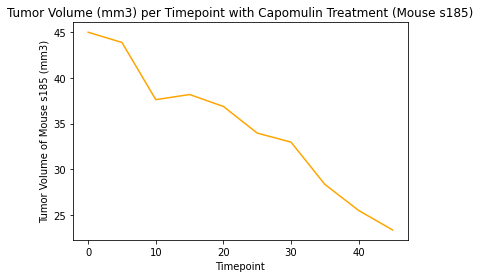

In [160]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#tumor volume vs time point for Capomulin
Capo = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"]=="Capomulin"]

CapoA = Capo.loc[Capo["Mouse ID"]=="s185"]


capT = CapoA["Timepoint"]
capV = CapoA["Tumor Volume (mm3)"]

plt.plot(capT, capV, color='orange')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume of Mouse s185 (mm3)")
plt.title("Tumor Volume (mm3) per Timepoint with Capomulin Treatment (Mouse s185)")

plt.show()



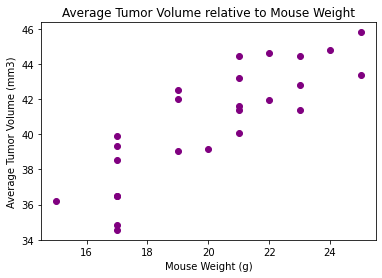

In [192]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capo = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"]=="Capomulin"]

capW_V = Capo.groupby(['Mouse ID']).mean()
plt.scatter(capW_V['Weight (g)'], capW_V['Tumor Volume (mm3)'], color="purple")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume relative to Mouse Weight')

plt.show()


## Correlation and Regression

0.84


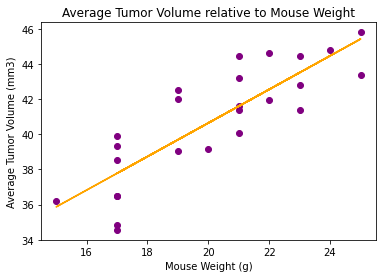

In [200]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

cor_coef = round(st.pearsonr(capW_V['Weight (g)'], capW_V['Tumor Volume (mm3)'])[0],2)
print(cor_coef)

x = capW_V['Weight (g)']
y = capW_V['Tumor Volume (mm3)']
line_model = st.linregress(x,y)
yval=x*line_model[0] + line_model[1]

plt.scatter(x,y, color= 'purple')
plt.plot(x,yval,color='orange')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume relative to Mouse Weight')

plt.show()